<a href="https://colab.research.google.com/github/Abdourahim445/Abdourahim445.github.io/blob/main/HW2/Asylla_ExamScore_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# task 1 read in the data and explore its properties

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/refs/heads/main/StudentPerformanceFactors_modified.csv")

In [5]:
df


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84.0,Low,High,No,7.0,73.0,Low,Yes,0.0,Low,Medium,Public,Positive,3.0,No,High School,Near,Male,67.0
1,19.0,64.0,Low,Medium,No,8.0,59.0,Low,Yes,2.0,Medium,Medium,Public,Negative,4.0,No,College,Moderate,Female,61.0
2,24.0,98.0,Medium,Medium,Yes,7.0,91.0,Medium,Yes,2.0,Medium,Medium,Public,Neutral,4.0,No,Postgraduate,Near,Male,74.0
3,29.0,89.0,Low,Medium,Yes,8.0,98.0,Medium,Yes,1.0,Medium,Medium,Public,Negative,4.0,No,High School,Moderate,Male,71.0
4,NaN,92.0,Medium,Medium,Yes,6.0,65.0,Medium,Yes,3.0,Medium,High,Public,Neutral,4.0,No,College,Near,Female,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,High,Medium,No,7.0,76.0,Medium,Yes,1.0,High,Medium,Public,Positive,2.0,No,High School,Near,Female,68.0
6603,23.0,76.0,High,Medium,No,8.0,81.0,Medium,Yes,3.0,Low,High,Public,Positive,2.0,No,High School,Near,Female,69.0
6604,NaN,90.0,Medium,Low,Yes,6.0,65.0,Low,Yes,3.0,Low,Medium,Public,Negative,2.0,No,Postgraduate,Near,Female,68.0
6605,10.0,86.0,High,High,Yes,6.0,91.0,High,Yes,2.0,Low,Medium,Private,Positive,3.0,No,High School,Far,Female,68.0


# task 2 generate a restricted dataset that only contains the numerical columns

In [6]:
df_restricted = df.select_dtypes(include='number')

In [9]:
df_restricted = df[[c for c in df.columns if df[c].dtype == 'float64']]

In [10]:
df_restricted.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6527.000000,6521.000000,6526.000000,6528.000000,6523.000000,6518.000000,6525.000000
mean,19.984832,79.990799,7.028042,75.067096,1.493791,2.966247,67.240307
std,5.993324,11.546369,1.469583,14.397116,1.231580,1.031094,3.882296
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


REMEMBER YOU NEED A CAPTION

In [11]:
df_restricted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hours_Studied      6527 non-null   float64
 1   Attendance         6521 non-null   float64
 2   Sleep_Hours        6526 non-null   float64
 3   Previous_Scores    6528 non-null   float64
 4   Tutoring_Sessions  6523 non-null   float64
 5   Physical_Activity  6518 non-null   float64
 6   Exam_Score         6525 non-null   float64
dtypes: float64(7)
memory usage: 361.4 KB


# task 3 investigate and remove missing values

<Axes: >

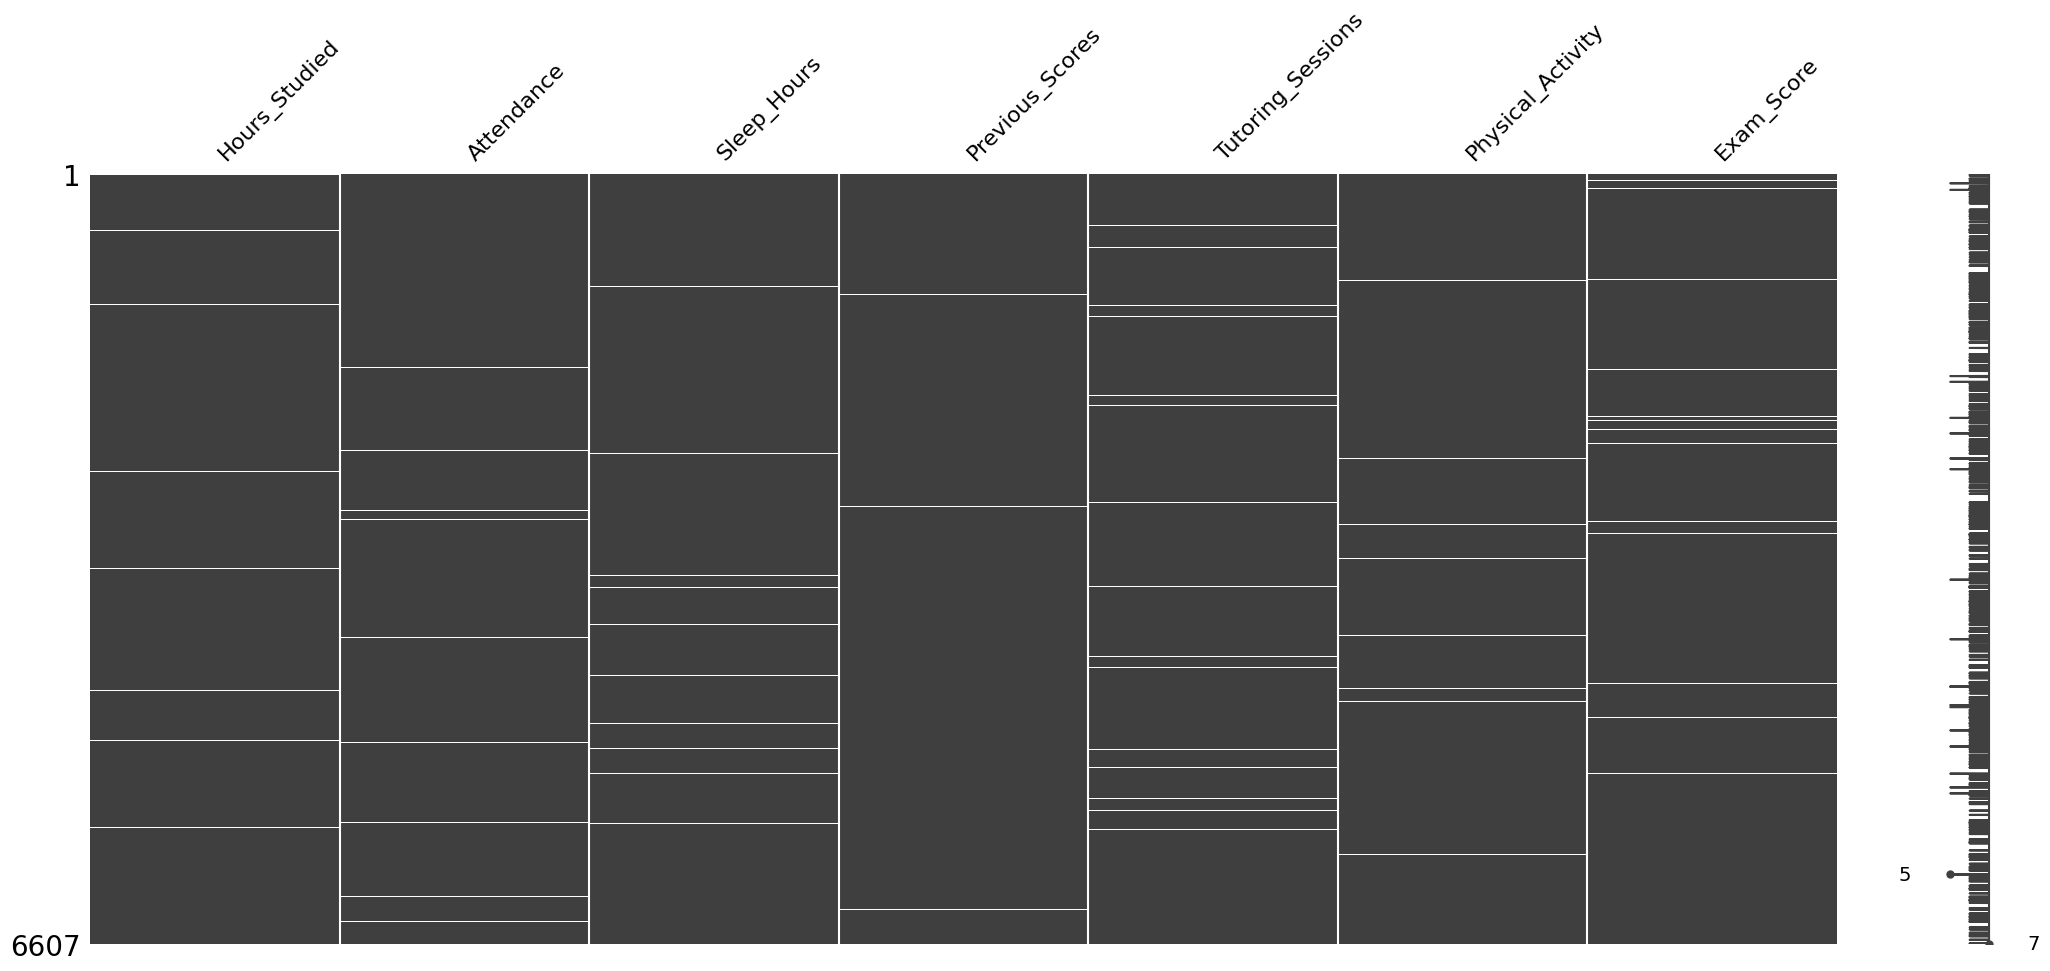

In [12]:
import missingno as msno
msno.matrix(df_restricted)

This image is showing the missing data Matrix visualization. It shows the presence and absence of data accross several columns.

REMEMBER YOU NEED A CAPTION

<Axes: >

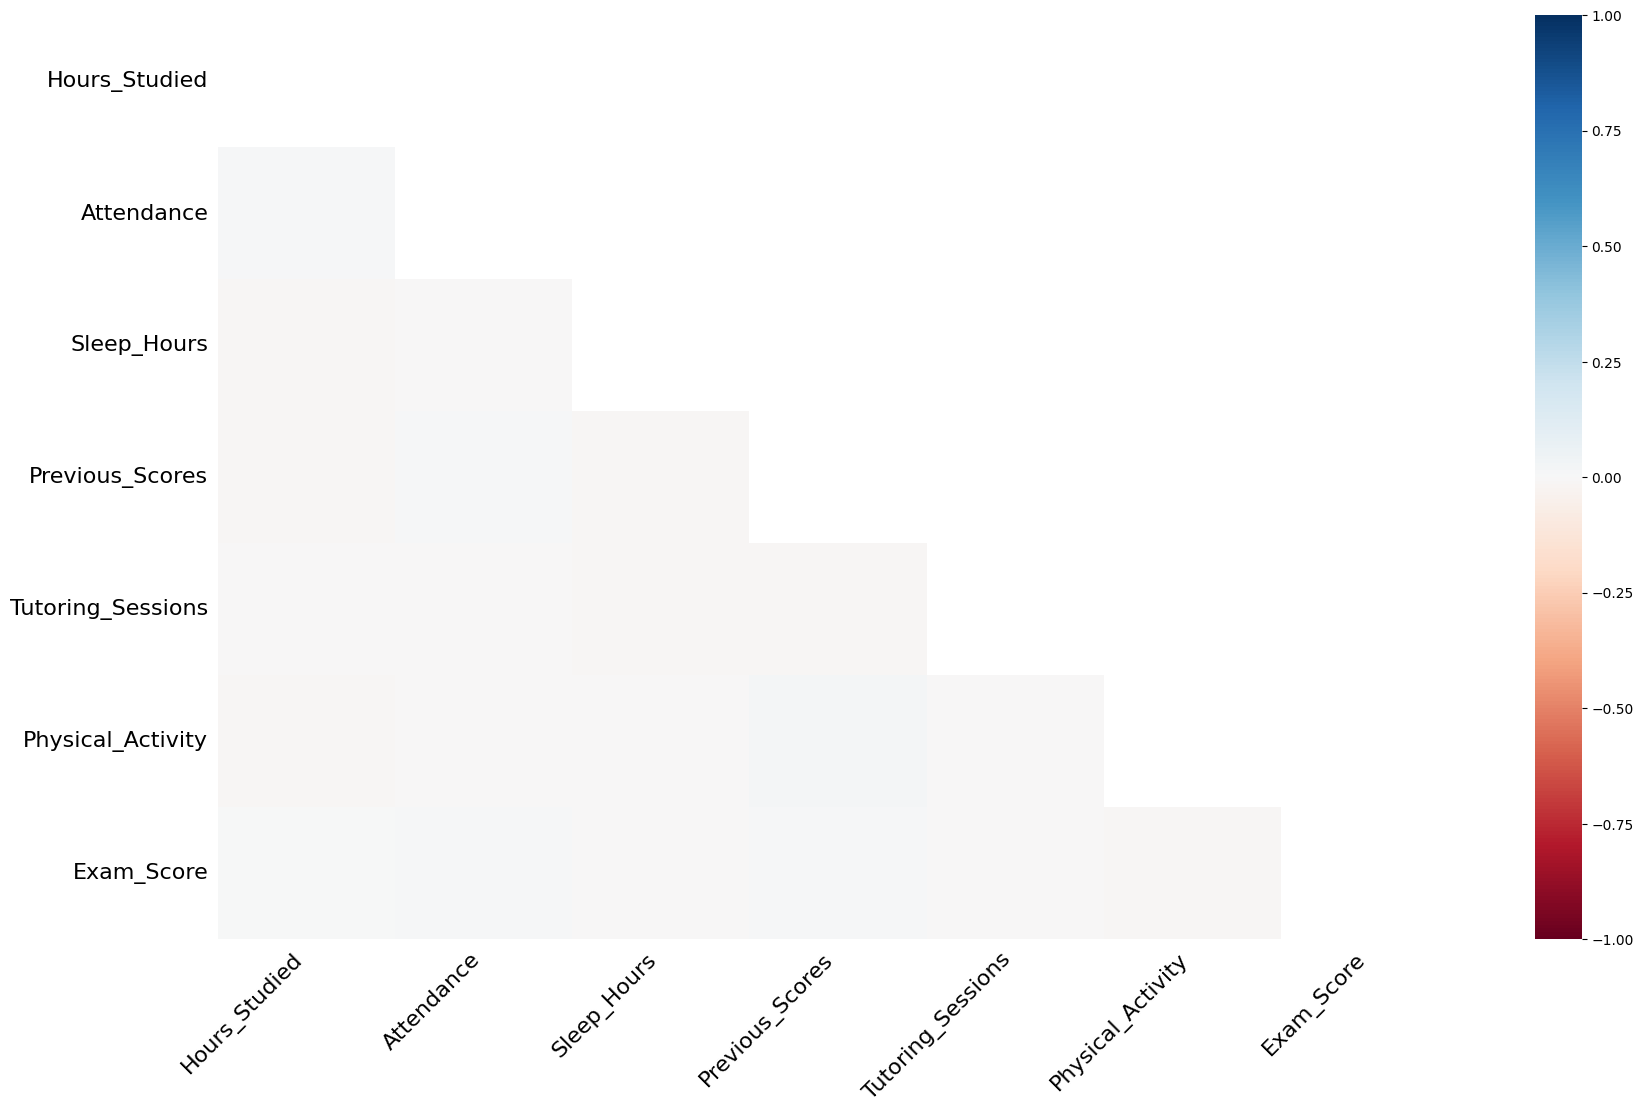

In [13]:
msno.heatmap(df_restricted)

This heatmap visualizes the correlation between various academic performance factors. This allows us to see at a glance how different factors are related to each other and how they might influence academic performance.

REMEMBER YOU NEED A CAPTION

In [14]:
df_restricted.isnull().sum()

,0
Hours_Studied,80
Attendance,86
Sleep_Hours,81
Previous_Scores,79
Tutoring_Sessions,84
Physical_Activity,89
Exam_Score,82


In [15]:
df_restricted.fillna(df_restricted.mean(), inplace=True)

<ipython-input-15-586e25f0d780>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restricted.fillna(df_restricted.mean(), inplace=True)


In [16]:
df_restricted.dropna(inplace=True)

<ipython-input-16-060f91560382>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_restricted.dropna(inplace=True)


In [17]:
df_restricted.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Sleep_Hours,0
Previous_Scores,0
Tutoring_Sessions,0
Physical_Activity,0
Exam_Score,0


In [18]:
df_restricted.shape

(6607, 7)

# task 4 report what percentage of data you lost by cleaning nans

In [19]:
print("percentage of lost  {:.2f}% of the data".format((df.shape[0] - df_restricted.shape[0]) / df.shape[0] * 100))

percentage of lost  0.00% of the data


# task 5 show the distribution of each column

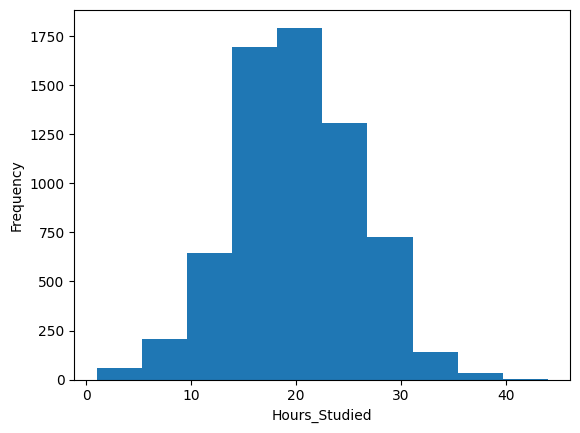

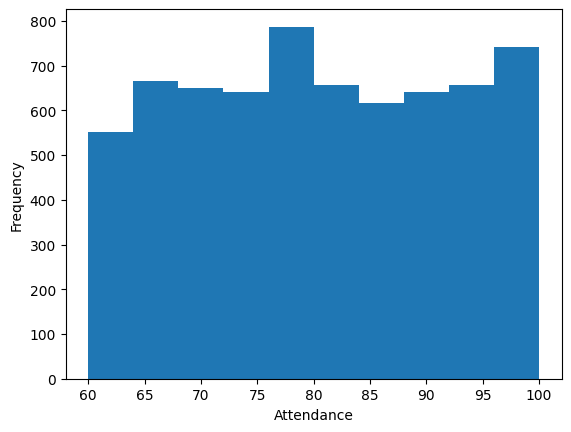

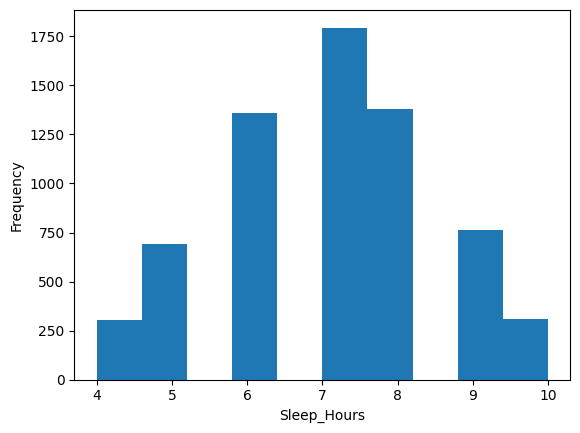

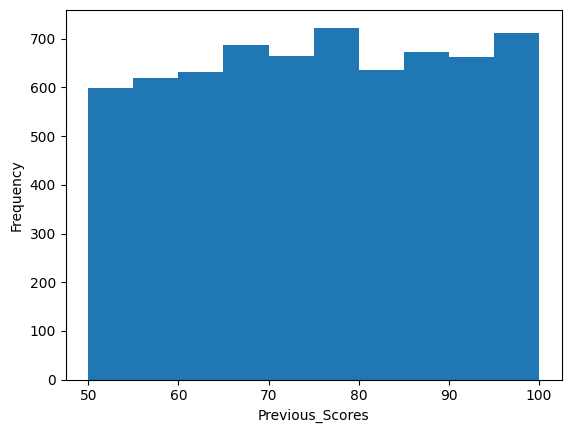

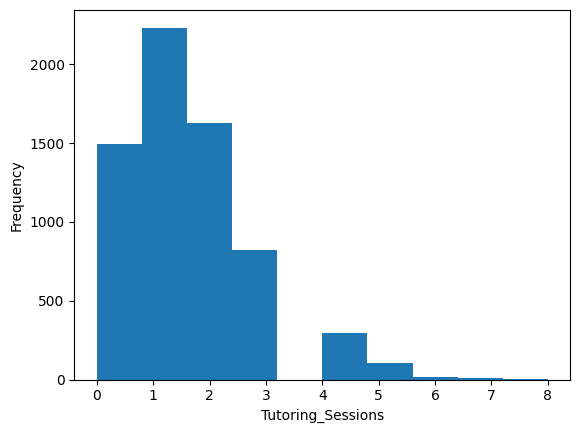

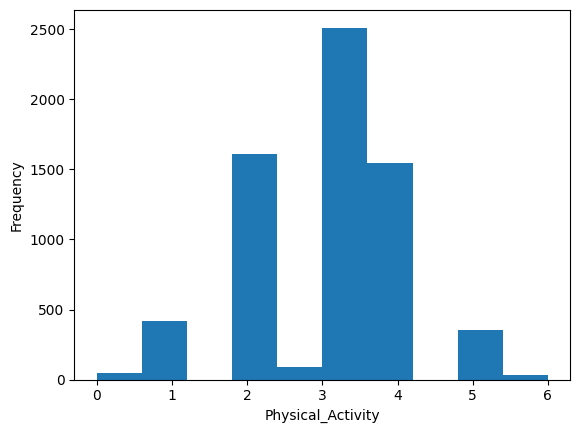

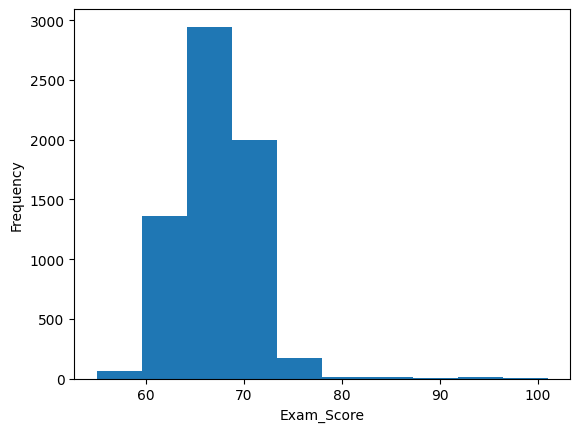

In [21]:
import matplotlib.pyplot as plt
for c in df_restricted.columns:
  plt.figure()
  plt.hist(df_restricted[c])
  plt.xlabel(c)
  plt.ylabel("Frequency")

Plotting the distribution of each column.

REMEMBER YOU NEED A CAPTION


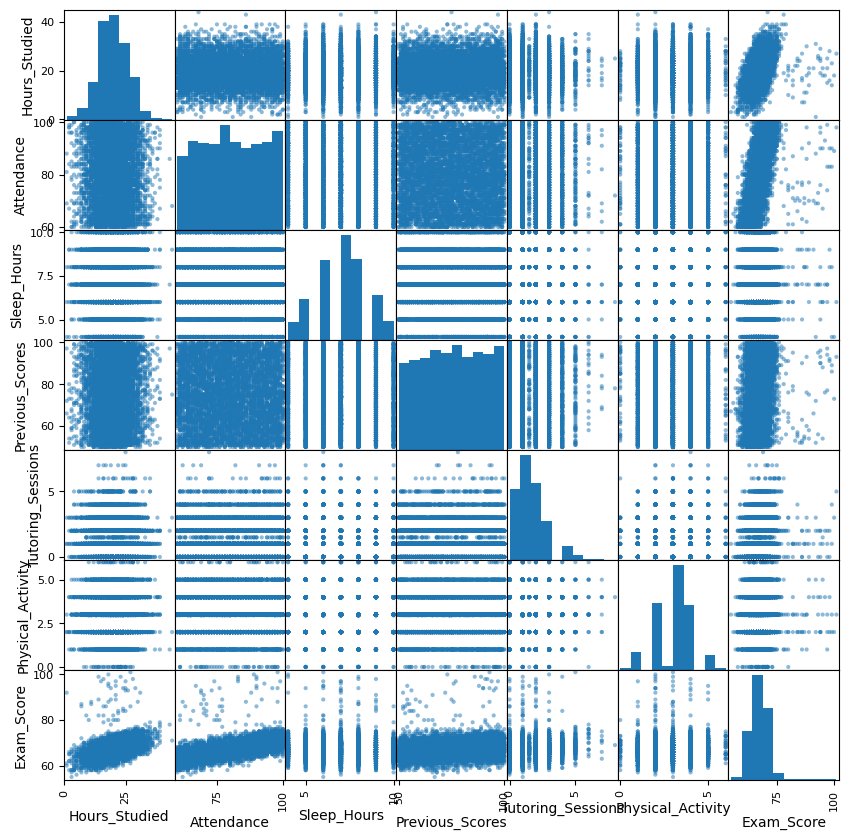

In [22]:
pd.plotting.scatter_matrix(df_restricted, figsize=(10, 10));

Displaying a pair plot matrix that visualizes the relationships between the column variables. This visualization is helps in understanding the correlations and distributions among the factors that might influence exam scores.

REMEMBER YOU NEED A CAPTION

# task 5 correlation analysis

In [23]:
df_restricted.corr()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
Hours_Studied,1.000000,-0.008588,0.012170,0.023179,-0.015065,0.003228,0.440209
Attendance,-0.008588,1.000000,-0.016015,-0.020711,0.011691,-0.020724,0.574876
Sleep_Hours,0.012170,-0.016015,1.000000,-0.017321,-0.012806,-0.002239,-0.012963
Previous_Scores,0.023179,-0.020711,-0.017321,1.000000,-0.012960,-0.010007,0.170717
Tutoring_Sessions,-0.015065,0.011691,-0.012806,-0.012960,1.000000,0.014828,0.154756
Physical_Activity,0.003228,-0.020724,-0.002239,-0.010007,0.014828,1.000000,0.026984
Exam_Score,0.440209,0.574876,-0.012963,0.170717,0.154756,0.026984,1.000000


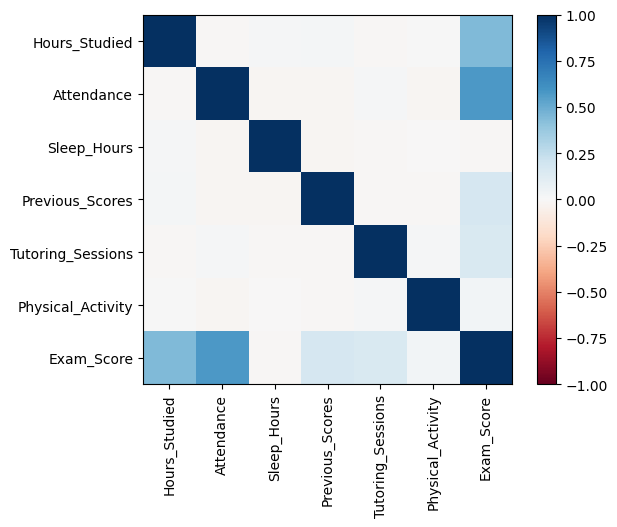

In [24]:
import pylab as plt
plt.imshow(df_restricted.corr(), clim=(-1, 1), cmap='RdBu')
plt.colorbar()
plt.xticks(range(len(df_restricted.columns)), df_restricted.columns, rotation=90)
plt.yticks(range(len(df_restricted.columns)), df_restricted.columns)
plt.show()

This image shows a heatmap representing the correlation matrix of various factors that might affect exam scores. The color intensity indicates the strength and direction of the correlation, with dark blue representing a strong positive correlation, dark red representing a strong negative correlation, and lighter colors indicating weaker correlations.

REMEMBER YOU NEED A CAPTION

# task 6 Make a linear regression model to predict "Exam_Score" using as exogenous variable the most highly correlated variable in the dataset

- make the model
- fit the data to the model
- get the score of the model
- show a scatter plot of the predicted Exam_Score against the true Exam_Score

R-squared score: 0.33964198263738854


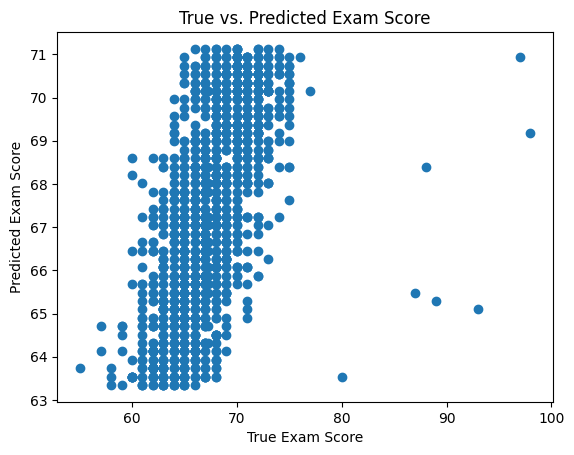

In [31]:
# prompt: Using sklearn.linear_model and LinearRegression
# Make a linear regression model to predict "Exam_Score" using as exogenous variable the most highly correlated variable in the dataset
# make the model
# fit the data to the model
# get the score of the model
# show a scatter plot of the predicted Exam_Score against the true Exam_Score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Find the most highly correlated variable with "Exam_Score"
corr_matrix = df_restricted.corr()
exam_score_corr = corr_matrix["Exam_Score"].sort_values(ascending=False)
most_correlated_variable = exam_score_corr.index[1]  # Exclude Exam_Score itself

# Prepare the data for the model
X = df_restricted[[most_correlated_variable]]
y = df_restricted["Exam_Score"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the score of the model on the test data
score = model.score(X_test, y_test)
print(f"R-squared score: {score}")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Show a scatter plot of the predicted Exam_Score against the true Exam_Score
plt.scatter(y_test, y_pred)
plt.xlabel("True Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("True vs. Predicted Exam Score")
plt.show()


R-squared: 0.33048213411606475


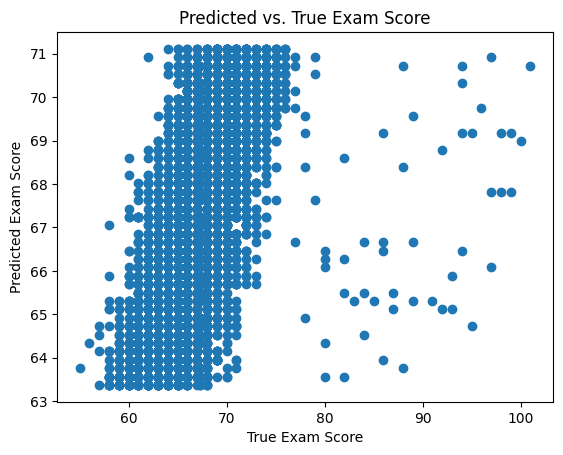

In [27]:
import statsmodels.formula.api as sm

# Identifying the most highly correlated variable with "Exam_Score"
correlation_matrix = df_restricted.corr()
exam_score_corr = correlation_matrix['Exam_Score'].sort_values(ascending=False)
most_correlated_variable = exam_score_corr.index[1]  # Exclude 'Exam_Score' itself

# Creating the linear regression model
model = sm.ols(formula=f'Exam_Score ~ {most_correlated_variable}', data=df_restricted)

# Fitting the model to the data
results = model.fit()

# Getting the score of the model (R-squared)
print(f"R-squared: {results.rsquared}")

# Predicting Exam_Score using the model
predicted_exam_score = results.predict()

# Create a scatter plot of predicted vs. true Exam_Score
plt.scatter(df_restricted['Exam_Score'], predicted_exam_score)
plt.xlabel("True Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Predicted vs. True Exam Score")
plt.show()


# task 7 Make a multilinear regression model to predict "Exam_Score" using as exogenous variables the two most highly correlated variables in the dataset

- make the model
- fit the data to the model
- get the score of the model
- show a scatter plot of the predicted Exam_Score against the true Exam_Score

R-squared: 0.5286517414982078


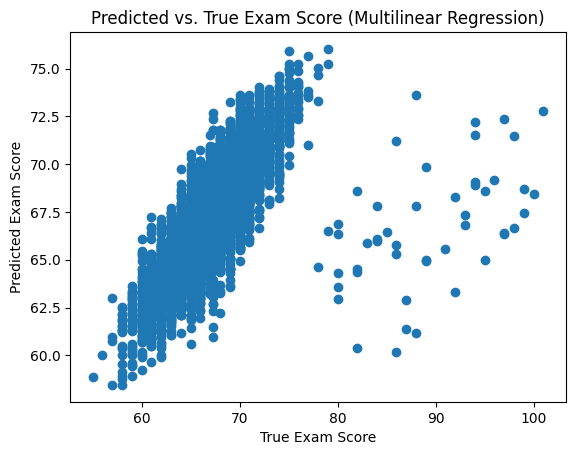

In [28]:
# Identifying the two most highly correlated variables with "Exam_Score"
correlation_matrix = df_restricted.corr()
exam_score_corr = correlation_matrix['Exam_Score'].sort_values(ascending=False)
most_correlated_variables = exam_score_corr.index[1:3]  # Exclude 'Exam_Score' itself

# Creating the multilinear regression model
formula = 'Exam_Score ~ ' + ' + '.join(most_correlated_variables)
model = sm.ols(formula=formula, data=df_restricted)

# Fitting the model to the data
results = model.fit()

# Getting the score of the model (R-squared)
print(f"R-squared: {results.rsquared}")

# Predicting Exam_Score using the model
predicted_exam_score = results.predict()

# Create a scatter plot of predicted vs. true Exam_Score
plt.scatter(df_restricted['Exam_Score'], predicted_exam_score)
plt.xlabel("True Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Predicted vs. True Exam Score (Multilinear Regression)")
plt.show()


# task 8 Make a multilinear regression model to predict "Exam_Score" using variables in the dataset

- make the model
- fit the data to the model
- get the score of the model
- show a scatter plot of the predicted Exam_Score against the true Exam_Score

R-squared: 0.5843909030235552


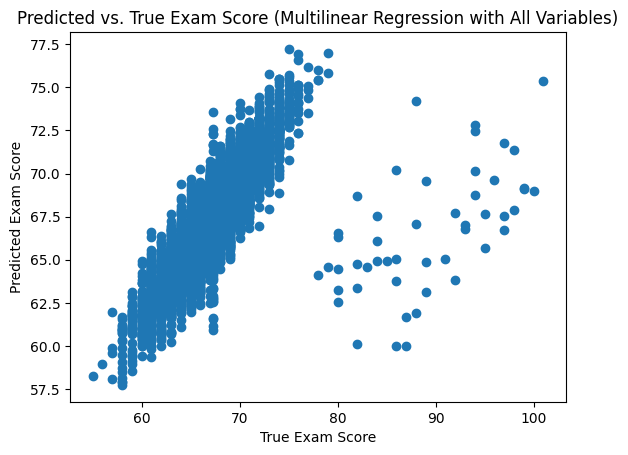

In [30]:
# Identifying all independent variables (excluding 'Exam_Score')
independent_variables = [col for col in df_restricted.columns if col != 'Exam_Score']

# Creating the multilinear regression model
formula = 'Exam_Score ~ ' + ' + '.join(independent_variables)
model = sm.ols(formula=formula, data=df_restricted)

# Fitting the model to the data
results = model.fit()

# Getting the score of the model (R-squared)
print(f"R-squared: {results.rsquared}")

# Predicting Exam_Score using the model
predicted_exam_score = results.predict()

# Create a scatter plot of predicted vs. true Exam_Score
plt.scatter(df_restricted['Exam_Score'], predicted_exam_score)
plt.xlabel("True Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Predicted vs. True Exam Score (Multilinear Regression with All Variables)")
plt.show()


# task 9 Compare the score and comment: is it predictable that the score gets better when you include more variables? why?

No, the score does not get better when you include more variables because the two graphs that represented those situations are the same. Therefore we can conclude that the two most correlated variables do not affect the Exam scores.